In [21]:
import numpy as np
import matplotlib.pyplot as plt

In [31]:
class Board:
    def __init__(self):
        self.num_rows = 8
        self.num_cols = 8
        self.square_size = 16
        self.light_square_color = (.85, .85, .85)
        self.dark_square_color = (.22, .5, .25)
        self.light_piece_color = (.7, .1, .1)
        self.dark_piece_color = (.1, .1, .7)

        # this is a 3d matrix containing all of the RBG values for each pixel of the board
        self.board = None

        # a 2d matrix to contain each of the pieces. for now we'll just concern ourselves with two queen,
        # which will be represented by a 202 for 'blue queen', and a 102 for 'red queen'
        self.pieces = None

        # piece as numbers:
        # all light pieces will be in the 100's
        # all dark pieces will be in the 200's
        # king = 1
        # queen = 2
        # bishop = 3
        # knight = 4
        # rook = 5
        # pawn = 6

        # so a light knight would be 104
        # a dark queen would be 202

        # for this initital setup, red is light, blue is dark


    def color_square(self, row, col, color):
        """
        Color any given square with any color tuple
        """
        for y in range(row * self.square_size, row * self.square_size + self.square_size):
            for x in range(col * self.square_size, col * self.square_size + self.square_size):
                if y % self.square_size < self.square_size*2:
                    if x % self.square_size < self.square_size*2:
                        self.board[y][x] = color

    def reset_square(self, row, col):
        """
        Set the board matrix at a given square to the proper base color, without any pieces on it
        """
        if (row % 2 and col % 2) or (not row % 2 and not col % 2):
            self.color_square(row, col, self.light_square_color)
        else:
            self.color_square(row, col, self.dark_square_color)

    def initialize_board(self):
        """
        Set up an empty board
        """
        self.board = np.zeros((self.num_rows * self.square_size, self.num_cols * self.square_size, 3))
        self.pieces = np.zeros((self.num_rows, self.num_cols))

        for y in range(self.num_rows):
            for x in range(self.num_cols):
                self.reset_square(y, x)

    def render(self):
        """
        Draw the board, with pieces on it
        """
        plt.imshow(self.board)


    def add_piece(self, row, col, piece):
        """
        Use a dictionary to lookup the shape of the piece to be drawn
        """

        add_piece_to_board =  {
            1: self.add_king,
            2: self.add_queen,
            3: self.add_bishop,
            4: self.add_knight,
            5: self.add_rook,
            6: self.add_pawn,
        }[piece%100]

        if piece > 200:
            color = self.dark_piece_color
        else:
            color = self.light_piece_color

        self.pieces[row][col] = piece
        add_piece_to_board(row, col, color)

    def add_king(self, row, col, color):
        pass

    def add_queen(self, row, col, color):
        for y in range(int(row * self.square_size + self.square_size/4), int(row * self.square_size + 3*self.square_size/4)):
            for x in range(int(col * self.square_size + self.square_size/4), int(col * self.square_size + 3*self.square_size/4)):
                if y % self.square_size < self.square_size*2:
                    if x % self.square_size < self.square_size*2:
                        self.board[y][x] = color
    
    def add_bishop(self, row, col, color):
        pass

    def add_knight(self, row, col, color):
        pass

    def add_rook(self, row, col, color):
        pass

    def add_pawn(self, row, col, color):
        pass

    # test function
    def add_red(self, row, col):
        self.add_piece(row, col, 102) # remember, we are representing the red queen as 102

    # test function
    def add_blue(self, row, col):
        self.add_piece(row, col, 202) # remember, we are representing the blue queen as 202

    # see if a blue queen is attacking the defined square, if a red queen exists there
    def is_under_attack(self, my_row, my_col):
        for row in range(len(self.pieces)):
            for col in range(len(self.pieces[row])):
                if int(self.pieces[row][col]) == 202:
                    if my_row == row or my_col == col or abs(row-my_row) == abs(col-my_col):
                        return True
        return False
        

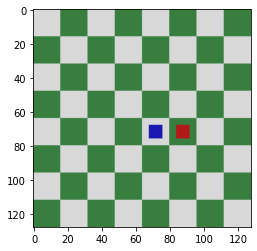

In [32]:
board = Board()
board.initialize_board()
board.add_red(4, 5)
board.add_blue(4, 4)
board.render()


In [33]:
assert board.is_under_attack(5, 5) is True

AssertionError: 

In [34]:
assert board.is_under_attack(5, 5) is False

In [35]:
board.pieces

array([[  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0., 202., 102.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.]])